# Import Libraries

In [1]:
# Week 8 — Cell 1: Importing Libraries (K-Means Clustering)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


# Load Dataset

In [2]:
# Week 8 — Cell 2: Load Mall Customers dataset

DATA_PATH = r"D:\AD_Lab\datasets\mall_customers\Mall_Customers.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully!")
print("\nShape:", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())


Dataset loaded successfully!

Shape: (200, 5)

First 5 rows:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# Feature Selection

In [3]:
# Week 8 — Cell 3: Select features for clustering

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Selected features:")
display(X.head())

print("\nShape of selected data:", X.shape)


Selected features:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40



Shape of selected data: (200, 2)


# Feature Scaling

In [4]:
# Week 8 — Cell 4: Feature scaling

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Feature scaling completed!")
print("Scaled data shape:", X_scaled.shape)


Feature scaling completed!
Scaled data shape: (200, 2)


# Apply K means Clustering

In [5]:
# Week 8 — Cell 5: Apply K-Means clustering

# Number of clusters
k = 5

# Initialize K-Means
kmeans = KMeans(
    n_clusters=k,
    random_state=42
)

# Fit the model and predict cluster labels
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

print("K-Means clustering applied successfully!")
print("\nCluster distribution:")
print(df['Cluster'].value_counts())


K-Means clustering applied successfully!

Cluster distribution:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


# Visualize Structures and Centroids

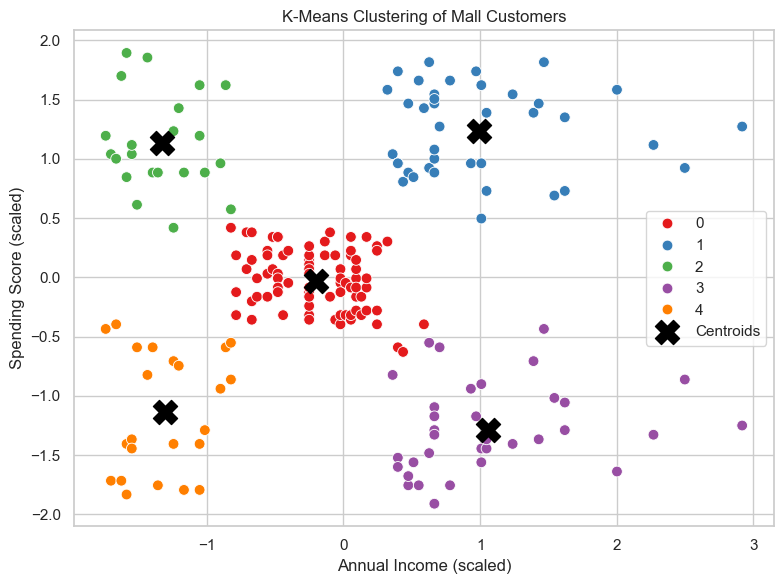

In [6]:
# Week 8 — Cell 6: Visualize clusters and centroids

plt.figure(figsize=(8,6))

# Scatter plot of customers colored by cluster
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=df['Cluster'],
    palette='Set1',
    s=60
)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering of Mall Customers")
plt.legend()
plt.tight_layout()
plt.show()


# Cluster Analysis and Interpretation


In [7]:
# Week 8 — Cell 7: Cluster analysis and interpretation

# Analyze clusters using original (unscaled) values
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("Cluster-wise average values:")
display(cluster_summary)


Cluster-wise average values:


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
